## calc_beach_slopes - Analyze beach slopes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from datetime import datetime
import xarray as xr
import pandas as pd

import netCDF4 as netcdf

from CoreBx_funcs import *
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

drive, computername = which_computer()
print('Working on ',computername)

# These commands choose fonts that are editable in svg format
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# colors
dblue = '#1f77b4'
red3 = ['#fee0d2','#fc9272','#de2d26']
# oranges from ColorBrewer https://colorbrewer2.org/#type=sequential&scheme=PuBu&n=5
cols=['#feedde','#fdbe85','#fd8d3c','#e6550d','#a63603']
blue5=['#f1eef6','#bdc9e1','#bdc9e1','#2b8cbe','#045a8d']
green5=['#edf8e9','#bae4b3','#74c476','#31a354','#006d2c']
purple5 = ['#f2f0f7','#cbc9e2','#9e9ac8','#756bb1','#54278f']

# Dates for DEMs
dates = ([\
         "2019-08-30",\
         "2019-09-12",\
         "2019-10-11",\
         "2019-11-26",\
         "2020-02-09",\
         "2020-04-09",\
         "2020-08-05",\
         "2020-08-09",\
         "2020-09-28",\
         "2021-05-30"])

dem_path =drive+'crs/proj/2019_DorianOBX/Dorian_paper_analyses/rotated_dems/'

# these offsets are the mean anomaly relative to the 10-map mean per Analyze_rotated_stable_points_refac
# Todo
# offset = np.array([0.00168195,  0.02229009, -0.02397204, -0.01150765, -0.07320715, -0.02726184,
#  -0.03547332, -0.02953579, -0.02719979,  0.00756222])

MHHW = 0.4 #elevation of MHHW per VDATUM

# Read in a dict that defines the rotated "island" coordinate system
r = yaml2dict('small_island_box.yml')
print(r)

Working on  IGSAGIEGWSCSH10
{'name': 'ncorebx_small', 'e0': 383520.0, 'n0': 3860830.0, 'xlen': 25000.0, 'ylen': 1200.0, 'dxdy': 1.0, 'theta': 42.0}


In [2]:
# load in map offsets
with open('offsets.yml') as f:
    offset = yaml.safe_load(f)
offset = np.array(offset)
print(offset)

[ 0.00168195  0.02229009 -0.02397204 -0.01150765 -0.07320715 -0.02726184
 -0.03547332 -0.02953579 -0.02719979  0.00756222]


In [4]:
# read in the multi-map .nc file
fn = r['name']+'_clipped.nc'
dsa = xr.open_dataset(dem_path+fn)
dsaa = np.squeeze(dsa.to_array())
nmaps,ncross,nalong=np.shape(dsaa)
print('nmaps, ncross, nalong: ',nmaps,ncross,nalong)

# Correct for uniform offsets
for i in range(0, nmaps):
    dsaa[i,:,:] = dsaa[i,:,:] - offset[i] 

nmaps, ncross, nalong:  10 1200 25000


In [5]:
# call beach_slope from CoreBx_funcs
slopes = np.nan*np.ones((nalong,4))
zinit = slopes.copy()

dist = np.array(dsaa['Cross-shore'])
for nmap in range(4):
    for i in range(nalong):
        prof = np.array(dsaa[nmap,:,i])
        zinit[i,nmap], slopes[i,nmap] = beach_slope(dist, prof)

all nans in beach_slope
all nans in beach_slope
all nans in beach_slope
all nans in beach_slope
all nans in beach_slope
all nans in beach_slope
all nans in beach_slope
all nans in beach_slope
all nans in beach_slope
all nans in beach_slope
all nans in beach_slope
all nans in beach_slope
all nans in beach_slope
all nans in beach_slope
all nans in beach_slope
all nans in beach_slope
all nans in beach_slope
all nans in beach_slope
all nans in beach_slope
all nans in beach_slope
all nans in beach_slope
all nans in beach_slope


In [6]:
dates

['2019-08-30',
 '2019-09-12',
 '2019-10-11',
 '2019-11-26',
 '2020-02-09',
 '2020-04-09',
 '2020-08-05',
 '2020-08-09',
 '2020-09-28',
 '2021-05-30']

In [7]:
df = pd.DataFrame({"30-Aug z":zinit[:,0], "12-Sep z":zinit[:,1], "11-Oct z": zinit[:,2], "26-Nov z": zinit[:,3],
                   "30-Aug s":slopes[:,0], "12-Sep s":slopes[:,1], "11-Oct s": slopes[:,2], "26-Nov s": slopes[:,3]})
#df = df.dropna() # There are 22 profiles missing in October
df.describe()

,30-Aug z,12-Sep z,11-Oct z,26-Nov z,30-Aug s,12-Sep s,11-Oct s,26-Nov s
count,25000.000000,25000.000000,24978.000000,25000.000000,25000.000000,25000.000000,24978.000000,25000.000000
mean,0.111167,0.031855,0.661733,-0.168187,0.090244,0.056590,0.053909,0.032674
std,0.320357,0.423817,0.395195,0.411887,0.029834,0.052082,0.060877,0.034633
min,-0.849316,-1.759476,-3.475480,-4.048737,-0.203127,-1.880782,-4.558677,-1.457008
25%,-0.141852,-0.319994,0.396142,-0.469074,0.075043,0.017766,0.027607,0.012720
50%,0.071424,-0.041290,0.601168,-0.258956,0.094004,0.059167,0.057020,0.029274
75%,0.371352,0.407161,0.888166,0.088137,0.109930,0.094315,0.084311,0.050937
max,1.532997,6.137696,9.805344,5.552327,0.265066,0.661824,1.540330,0.212865


NaNs before:  22
NaNs after:  0

Median map-edge elevations:  [ 0.07142431 -0.04128965  0.60175347 -0.25895639]


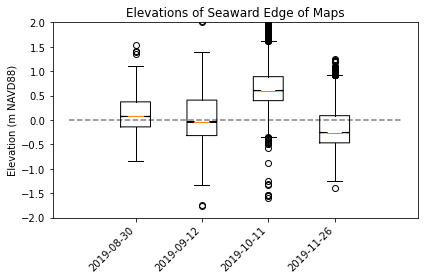

In [8]:
# zinit is an array, [25000,4]. There are some NaNs in the third column.
print('NaNs before: ',np.nansum(np.isnan(zinit[:,2])))
# Not very many, so filling them with mean values
zinit[np.where(np.isnan(zinit[:,2])),2]=np.nanmean(zinit[:,2])
# Now they are gone
print('NaNs after: ',np.nansum(np.isnan(zinit[:,2])))
print('\nMedian map-edge elevations: ',np.median(zinit,0))

fig,ax = plt.subplots(1,1)
ax.plot([0,5],[0,0],'--',c='gray')
_ = ax.boxplot(zinit[:,0:4],notch=True)
_ = ax.set_xticklabels(dates[0:4],rotation=45,ha='right')
ax.set_ylim((-2,2))
ax.set_ylabel('Elevation (m NAVD88)')
ax.set_title('Elevations of Seaward Edge of Maps')
plt.tight_layout()
fig.savefig('map_edge_elevations.svg')

NaNs before:  22
NaNs after:  0

Median slopes for each map:  [0.09400404 0.05916668 0.05694951 0.02927372]


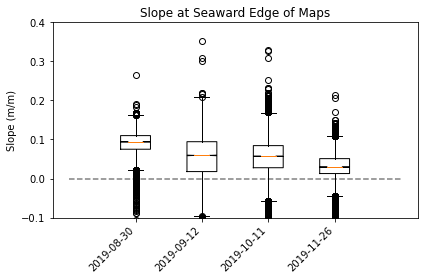

In [9]:
# zinit is an array, [25000,4]. There are some NaNs in the third column.
print('NaNs before: ',np.nansum(np.isnan(slopes[:,2])))
# Not very many, so filling them with mean values
slopes[np.where(np.isnan(slopes[:,2])),2]=np.nanmean(slopes[:,2])
# Now they are gone
print('NaNs after: ',np.nansum(np.isnan(slopes[:,2])))
print('\nMedian slopes for each map: ',np.median(slopes,0))

fig,ax = plt.subplots(1,1)
ax.plot([0,5],[0,0],'--',c='gray')
_ = ax.boxplot(slopes[:,0:4],notch=True)
_ = ax.set_xticklabels(dates[0:4],rotation=45,ha='right')
ax.set_ylim((-.1,.4))
ax.set_ylabel('Slope (m/m)')
ax.set_title('Slope at Seaward Edge of Maps')
plt.tight_layout()
fig.savefig('map_edge_slope.svg')

In [ ]:
plt.plot(zinit[:,0],'.')
plt.plot(zinit[:,1],'.')
plt.ylim([-1.5, 1.5])